<a href="https://colab.research.google.com/github/ankeshkmr2010/ml_and_ann/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment : Lending Club Loan Data Analysis. Ankesh

In [181]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [182]:
import keras
import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot

In [183]:
data = pd.read_csv("/content/drive/MyDrive/AEKA_TECH/loan_data.csv")

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [185]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [186]:
data.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [187]:
cat_cols_encoded = [f"purpose_{cat}" for cat in list(data.purpose.unique())]
cat_cols_encoded

['purpose_debt_consolidation',
 'purpose_credit_card',
 'purpose_all_other',
 'purpose_home_improvement',
 'purpose_small_business',
 'purpose_major_purchase',
 'purpose_educational']

In [188]:
y = pd.get_dummies(data.purpose, prefix='purpose')
y

,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
9573,1,0,0,0,0,0,0
9574,1,0,0,0,0,0,0
9575,0,0,1,0,0,0,0
9576,0,0,0,0,1,0,0


In [189]:
data_enc = pd.concat([data,y], axis =1)
data_enc

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,...,0,0,1,1,0,0,0,0,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,...,0,0,1,1,0,0,0,0,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,...,0,0,1,0,0,1,0,0,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,...,0,0,1,0,0,0,0,1,0,0


In [190]:
data_enc = data_enc.drop('purpose',axis='columns')
data_enc

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [191]:
total = data.isnull().sum().sort_values(ascending=False)
total

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

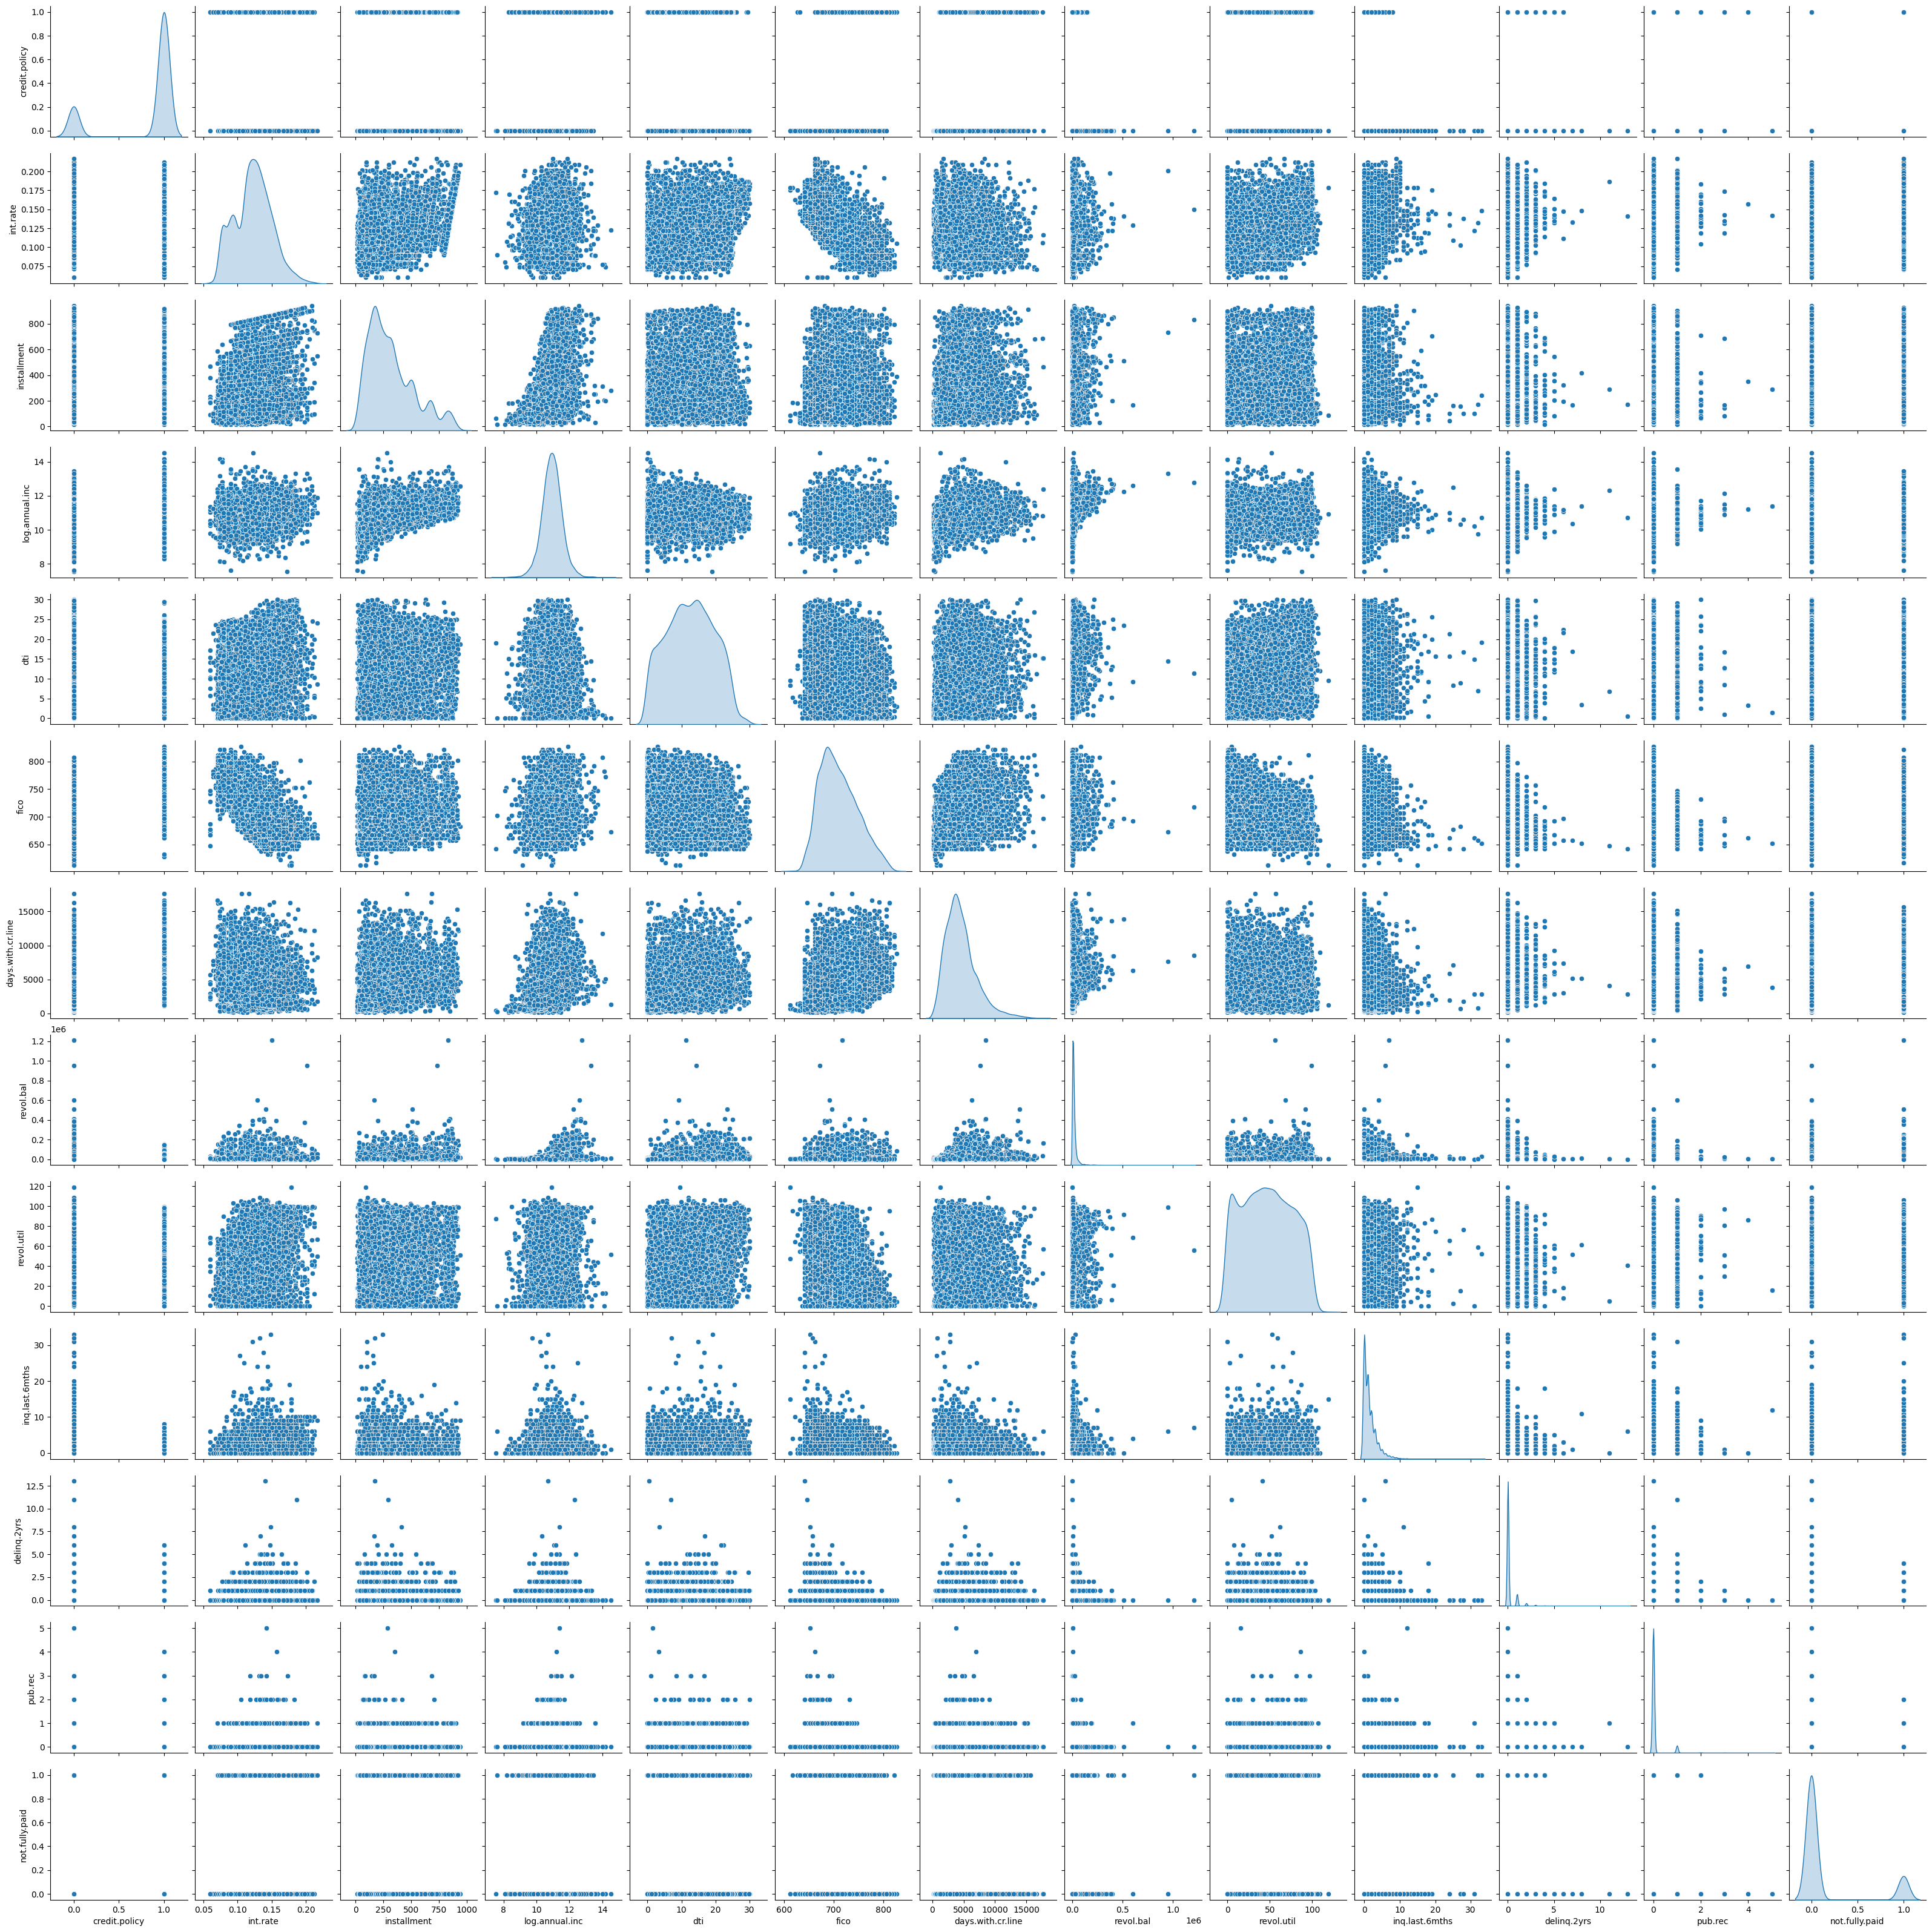

In [192]:
sns.pairplot(data,diag_kind='kde')

<Axes: >

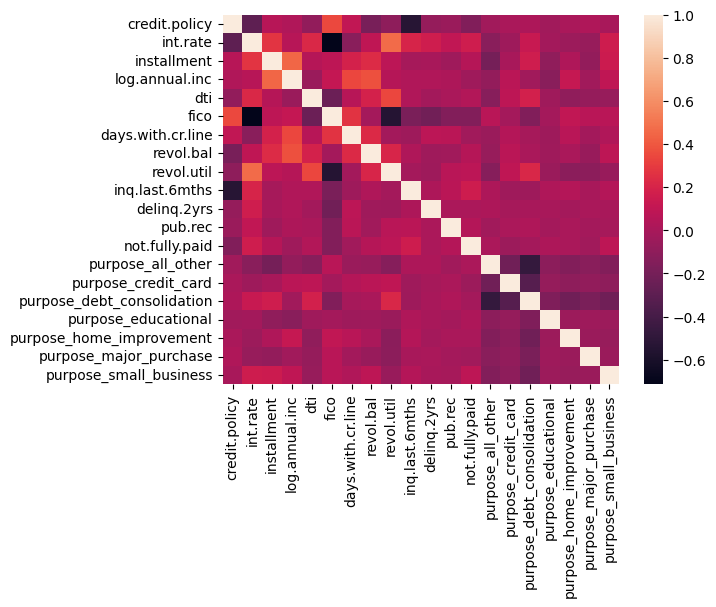

In [ ]:
sns.heatmap(data_enc.corr(),annot=False)

In [193]:
data_enc.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.124000,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,-0.203103,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,-0.080077,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.125825,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.067184,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,-0.056574,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,-0.067728,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.138535,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.017795,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


In [194]:
corr_matrix = data_enc.corr().abs()

In [195]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

<ipython-input-195-f48403b9242a>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,NaN,0.294089,0.05877,0.034906,0.090901,0.348319,0.099026,0.187518,0.104095,0.535511,0.076318,0.054243,0.158119,0.025412,0.003216,0.020193,0.031346,0.006036,0.024281,0.003511
int.rate,NaN,NaN,0.27614,0.056383,0.220006,0.714821,0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,0.124000,0.042109,0.123607,0.019618,0.050697,0.068978,0.151247
installment,NaN,NaN,NaN,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,0.010419,0.004368,0.032760,0.049955,0.203103,0.000774,0.161658,0.094510,0.023024,0.079836,0.145654
log.annual.inc,NaN,NaN,NaN,NaN,0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,0.033439,0.080077,0.072942,0.026214,0.119799,0.116375,0.031020,0.091540
dti,NaN,NaN,NaN,NaN,NaN,0.241191,0.060101,0.188748,0.337109,0.029189,0.021792,0.006209,0.037362,0.125825,0.084476,0.179149,0.035325,0.092788,0.077719,0.069245
fico,NaN,NaN,NaN,NaN,NaN,NaN,0.263880,0.015553,0.541289,0.185293,0.216340,0.147592,0.149666,0.067184,0.012512,0.154132,0.013012,0.097474,0.067129,0.063292
days.with.cr.line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229344,0.024239,0.041736,0.081374,0.071826,0.029237,0.056574,0.046220,0.009318,0.042621,0.068087,0.020561,0.034883
revol.bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.203779,0.022394,0.033243,0.031010,0.053699,0.067728,0.072316,0.005785,0.034743,0.003258,0.062395,0.083069
revol.util,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013880,0.042740,0.066717,0.082088,0.138535,0.091321,0.211869,0.053128,0.114449,0.108079,0.060962
inq.last.6mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021245,0.072673,0.149452,0.017795,0.033640,0.044240,0.024243,0.043827,0.001445,0.042567


In [196]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
to_drop

['fico']

# Assumption: Since no target col labeled default is given I am assuming not.fully.paid as the target coumn.
All further model creation and prediction is done with this assumption in mind

Note: Output.csv did not have any column headers. Hence used the columns available in loan_data.csv


In [199]:
x = data_enc.drop(columns=['not.fully.paid'],axis="column")
y = data_enc['not.fully.paid']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [200]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  purpose_all_other           9578 non-null   uint8  
 13  purpose_credit_card         9578 

In [ ]:
x.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [ ]:
y.value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [201]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_RES,Y_RES = sm.fit_resample(x,y)

In [ ]:
Y_RES.shape

(16090,)

In [ ]:
Y_RES.value_counts()

0    8045
1    8045
Name: not.fully.paid, dtype: int64

In [202]:
x_train, x_test, y_train, y_test = train_test_split(X_RES, Y_RES, test_size=0.33)

In [ ]:
y_test.shape

(3218,)

In [203]:
model = Sequential(name="loan_data",)
# l1
model.add(Dense( 1024, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# l2
model.add(Dense( 512, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# l3
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# l4
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# l5
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# l6
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# l7
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# l8
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# l9
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))
# l1o
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization(synchronized=True))

# out has 1 nueron because output is 0 or 1
model.add(Dense(1, activation='sigmoid'))
model.summary()



Model: "loan_data"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_130 (Dense)           (None, 1024)              20480     
                                                                 
 dropout_95 (Dropout)        (None, 1024)              0         
                                                                 
 batch_normalization_102 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dense_131 (Dense)           (None, 512)               524800    
                                                                 
 dropout_96 (Dropout)        (None, 512)               0         
                                                                 
 batch_normalization_103 (Ba  (None, 512)              2048      
 tchNormalization)                                       

In [208]:
# Compile
# model.compile(loss="binary_crossentropy",
#               optimizer="adam",
#               metrics=['accuracy',"Precision","Recall"])
from tensorflow.keras.optimizers import Adam, Nadam
model.compile(loss='binary_crossentropy',
              optimizer=Nadam(lr=0.1),
              metrics=['accuracy','Precision','Recall'])

In [211]:
batch_size = 2000
epochs = 1000
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test))
# Model Eval
score = model.evaluate(x_test, y_test, verbose=0)
for i in range(len(score)):
    print(f'{model.metrics_names[i]} — -> {score[i]}')

Epoch 1/1000
6/6 [==============================] - 1s 243ms/step - loss: 0.5981 - accuracy: 0.6979 - precision: 0.6658 - recall: 0.7868 - val_loss: 0.7502 - val_accuracy: 0.5925 - val_precision: 0.6189 - val_recall: 0.5080
Epoch 2/1000
6/6 [==============================] - 1s 233ms/step - loss: 0.5786 - accuracy: 0.7244 - precision: 0.6953 - recall: 0.7926 - val_loss: 0.7135 - val_accuracy: 0.6232 - val_precision: 0.6517 - val_recall: 0.5496
Epoch 3/1000
6/6 [==============================] - 1s 232ms/step - loss: 0.5767 - accuracy: 0.7215 - precision: 0.6946 - recall: 0.7844 - val_loss: 0.7018 - val_accuracy: 0.6254 - val_precision: 0.6270 - val_recall: 0.6426
Epoch 4/1000
6/6 [==============================] - 2s 263ms/step - loss: 0.5799 - accuracy: 0.7224 - precision: 0.6916 - recall: 0.7967 - val_loss: 0.6976 - val_accuracy: 0.6328 - val_precision: 0.6109 - val_recall: 0.7568
Epoch 5/1000
6/6 [==============================] - 1s 225ms/step - loss: 0.5791 - accuracy: 0.7162 - pr

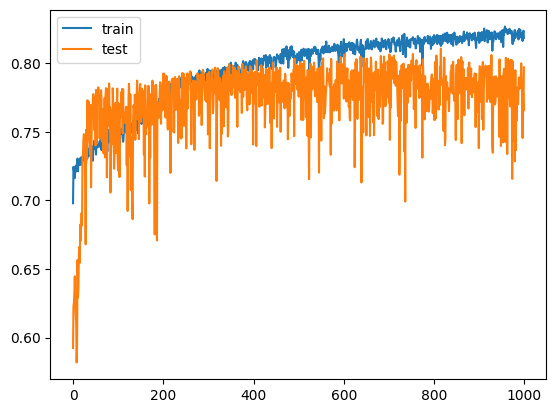

In [212]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [213]:
score = model.evaluate(x_test, y_test, verbose=0)
for i in range(len(score)):
    print(f'{model.metrics_names[i]} — -> {score[i]}')

loss — -> 0.6627076864242554
accuracy — -> 0.7967984676361084
precision — -> 0.8385197520256042
recall — -> 0.7415395975112915
